###Libraries

In [1]:
#classification
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#neural network
from keras.models import Sequential
from keras.layers import Dense

#decision tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

#regression(using decision tree)
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error

###data exploration

In [2]:
dataset = pd.read_csv(r"C:\Users\Salma\Documents\diabetes.csv")

In [3]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


###data preprocessing

In [5]:
dataset.duplicated().sum()

0

In [6]:
dataset.describe().round()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0
mean,4.0,121.0,69.0,21.0,80.0,32.0,0.0,33.0,0.0
std,3.0,32.0,19.0,16.0,115.0,8.0,0.0,12.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0
25%,1.0,99.0,62.0,0.0,0.0,27.0,0.0,24.0,0.0
50%,3.0,117.0,72.0,23.0,30.0,32.0,0.0,29.0,0.0
75%,6.0,140.0,80.0,32.0,127.0,37.0,1.0,41.0,1.0
max,17.0,199.0,122.0,99.0,846.0,67.0,2.0,81.0,1.0


In [7]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: xlabel='Age'>

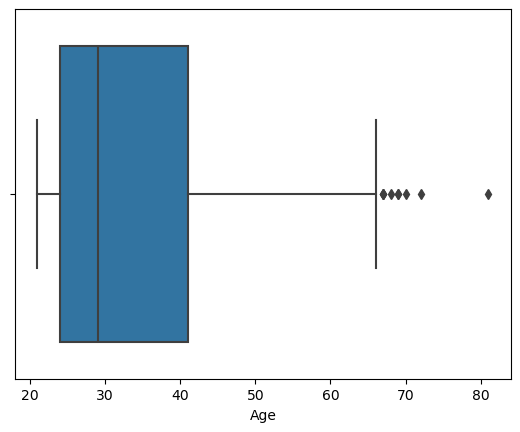

In [8]:
sns.boxplot(x='Age',data=dataset)

<Axes: xlabel='Age'>

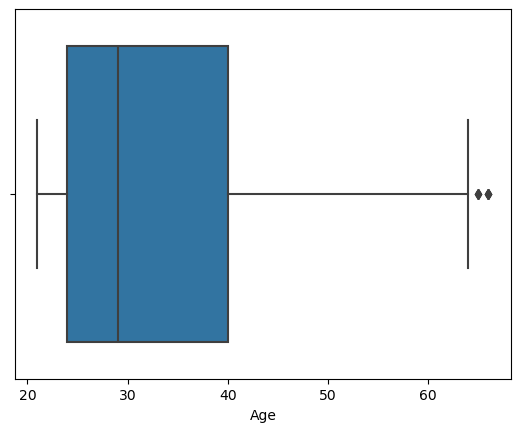

In [9]:
# Calculate the first quartile (Q1) and third quartile (Q3) of column 'A'
Q1 = dataset['Age'].quantile(0.25)
Q3 = dataset['Age'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Set a threshold for outliers (e.g., values outside of Q1 - 1.5*IQR and Q3 + 1.5*IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in column 'A'
outliers = dataset[(dataset['Age'] < lower_bound) | (dataset['Age'] > upper_bound)]

no_outliers = dataset.drop(outliers.index)
dataset = no_outliers.reset_index(drop=True)

sns.boxplot(x='Age',data=dataset)

<Axes: xlabel='Age'>

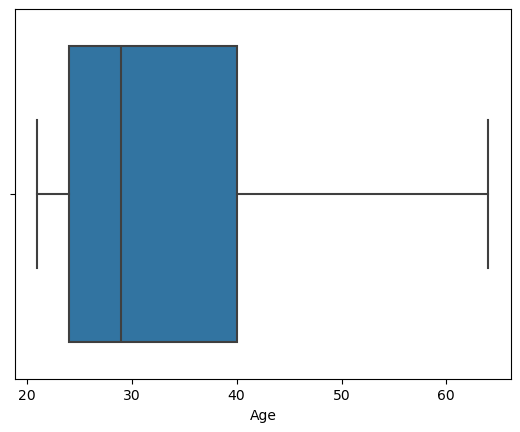

In [10]:
# Calculate the first quartile (Q1) and third quartile (Q3) of column 'A'
Q1 = dataset['Age'].quantile(0.25)
Q3 = dataset['Age'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Set a threshold for outliers (e.g., values outside of Q1 - 1.5*IQR and Q3 + 1.5*IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in column 'A'
outliers2 = dataset[(dataset['Age'] < lower_bound) | (dataset['Age'] > upper_bound)]

no_outliers2 = dataset.drop(outliers2.index)
dataset = no_outliers2.reset_index(drop=True)

sns.boxplot(x='Age',data=dataset)

###data visualization

<Axes: xlabel='Outcome', ylabel='count'>

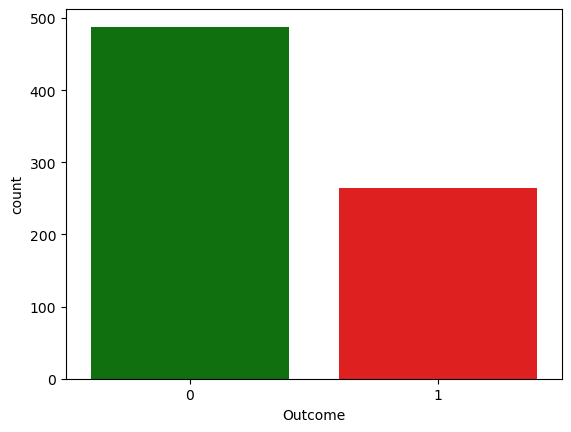

In [11]:
sns.countplot(x='Outcome',data=dataset,palette=['g','r'])

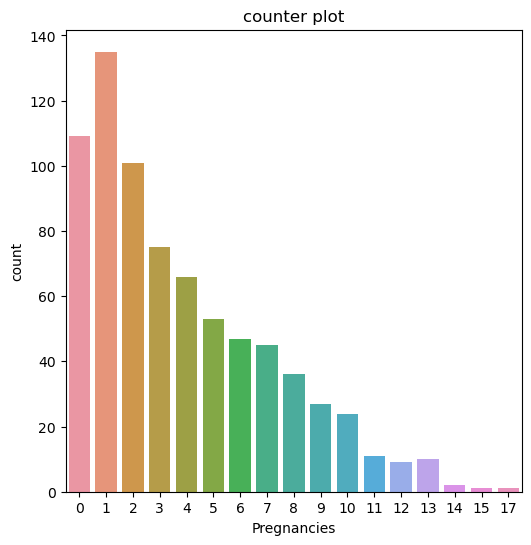

In [12]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title("counter plot")
sns.countplot(x = 'Pregnancies',data=dataset)
plt.show()

###classification

In [13]:
x=dataset.drop('Outcome',axis=1)
y=dataset['Outcome']

In [14]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
747,10,101,76,48,180,32.9,0.171,63
748,2,122,70,27,0,36.8,0.340,27
749,5,121,72,23,112,26.2,0.245,30
750,1,126,60,0,0,30.1,0.349,47


In [15]:
y

0      1
1      0
2      1
3      0
4      1
      ..
747    0
748    0
749    0
750    1
751    0
Name: Outcome, Length: 752, dtype: int64

#to be continue...

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

###Logistic regression

In [17]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [18]:
model.predict(x_test)

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [19]:
y_pred=model.predict(x_test)

In [20]:
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Confusion Matrix:
 [[113  12]
 [ 32  31]]
Accuracy: 0.7659574468085106
Precision: 0.7209302325581395
Recall: 0.49206349206349204
F1 Score: 0.5849056603773584


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       125
           1       0.72      0.49      0.58        63

    accuracy                           0.77       188
   macro avg       0.75      0.70      0.71       188
weighted avg       0.76      0.77      0.75       188



###Neural network

In [22]:


classifier = Sequential()

classifier.add(Dense(10, activation='relu', input_dim=8))  # Update input_dim to match the number of features (8)
classifier.add(Dense(50, activation='relu'))
classifier.add(Dense(1, activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

classifier.fit(x_train, y_train, batch_size=10, epochs=100)

y_pred_prob = classifier.predict(x_test)

y_pred = (y_pred_prob > 0.5)
print("Accuracy:", accuracy_score(y_test, y_pred))

Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4638 - loss: 6.6466
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4913 - loss: 0.9320
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5805 - loss: 0.8968
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5024 - loss: 0.8014
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5449 - loss: 0.7749
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5815 - loss: 0.7704
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5784 - loss: 0.7369
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6420 - loss: 0.6880
Epoch 9/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6399 - loss: 0.6758
Epoch 10/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6430 - loss: 0.6407
Epoch 11/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6373 - loss: 0.6537
Epoch 12/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy:

In [23]:
y_pred_prob[:10]

array([[0.2987057 ],
       [0.37501472],
       [0.86732274],
       [0.5238757 ],
       [0.97592235],
       [0.19351704],
       [0.7870055 ],
       [0.20920226],
       [0.5759469 ],
       [0.09358486]], dtype=float32)

###Decision tree

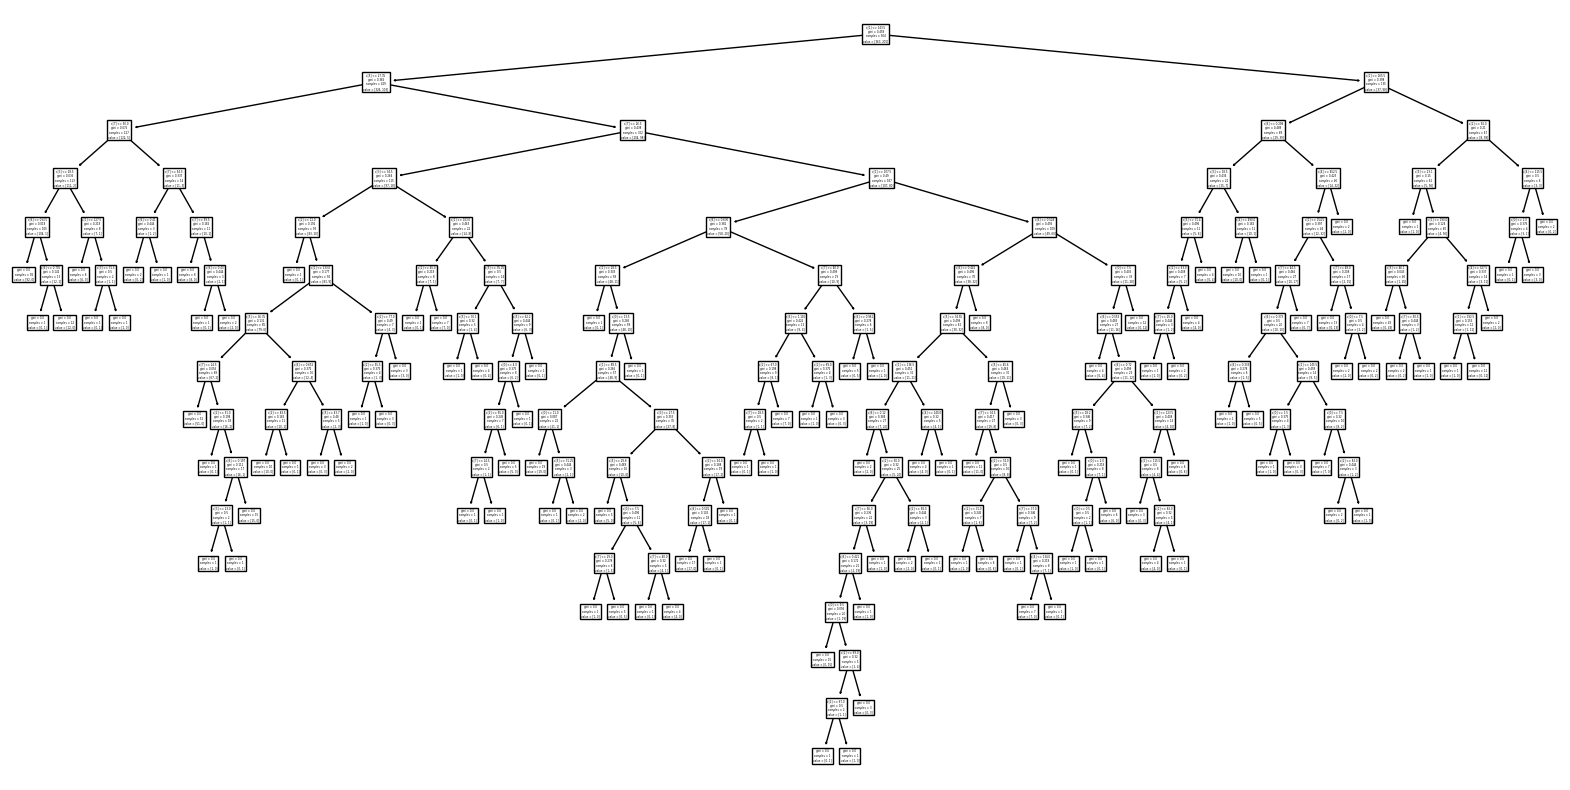

In [24]:
tree_model = DecisionTreeClassifier()
#You can find a simple description of each parameter by pressing Tab+Shift in between parenthesis
tree_model.fit(x_train, y_train)
plt.figure(figsize=(20, 10))
plot_tree(tree_model)
plt.show()

In [25]:
#tree classifier testing
y_pred = tree_model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7180851063829787


In [26]:
#loading dataset
dataset = pd.read_csv(r"C:\Users\Salma\Documents\diabetes.csv")
x=dataset.drop('Outcome',axis=1)
y=dataset['Outcome']

print("dataset:", x.shape)

dataset: (768, 8)


In [27]:
#data splitting intro train/test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

#training the regressor model
tree_regressor = DecisionTreeRegressor() 
tree_regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [28]:
#model testing
y_pred = tree_regressor.predict(x_test)
print("MSE", mean_squared_error(y_test, y_pred))

MSE 0.3125
